## Grupo: 
 Mateus Ribeiro: 555225, Hubert Luz: 552798, Vinchensus Lobo: 554036. 
### Importando as bibliotecas

In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play
from pathlib import Path 

### Função auxiliar para plotagem de um vetor no domínio da frequência em dB

In [2]:
def spectrum(x_freq):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(x_freq)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

### 1. Lendo o arquivo .wav para obter o sinal x[n] em forma de vetor

In [3]:
data_path=Path('../data')
wav_files = list(data_path.glob('*.wav'))

sample_rate_1, signal_1 = read(data_path/'01.wav')
sample_rate_2, signal_2 = read(data_path/'02.wav')

print(f"Sample_Rate_1: {sample_rate_1}")
print(f"Sample_Rate_2: {sample_rate_2}")
print(f"Signal1 : {signal_1}")
print(f"Signal 2: {signal_2}")

Sample_Rate_1: 44100
Sample_Rate_2: 22050
Signal1 : [ 107   79    9 ...  -55 -188 -160]
Signal 2: [-2685 -1229  1533 ...  -449   -86   311]


### 2. Plotando o gráfico de x[n] no tempo e de seu espectro de frequência

In [24]:
"""
Primeiro vamos pegar o numero de amostras de cada sinal para que possamos calcular o tempo total do sinal, 
isso é feito simplesmente dividindo o número de amostras pela frequência, em seguida criamos um vetor de
tempo t que será usado para plotar o sinal no domínio do tempo
"""

N1 = len(signal_1)
N2 = len(signal_2)

T1 = N1/sample_rate_1
T2 = N2/sample_rate_2

t1 = np.linspace(0, T1, N1, endpoint=False)
t2 = np.linspace(0, T2, N2, endpoint=False)

"""
Em seguinda, para obtermos no domínio da frequência, basta aplicarmos a transformada de fourier nos sinais usando
a fft() e usar a fftfreq() para pegar o array de frequências que correspondem aos componentes da fft
"""
signal_1_f = fft(signal_1)
signal_2_f = fft(signal_2)
s1f = fftfreq(N1, 1 / sample_rate_1)
s2f = fftfreq(N2, 1 / sample_rate_2)

"""
Armazenando em listas para facilitar o plot
"""
signals = [signal_1, signal_2]
sample_rates = [sample_rate_1, sample_rate_2]
ts = [t1, t2]
ffts = [signal_1_f, signal_2_f]
fs = [s1f, s2f]
spectrums = list(map(spectrum, ffts))

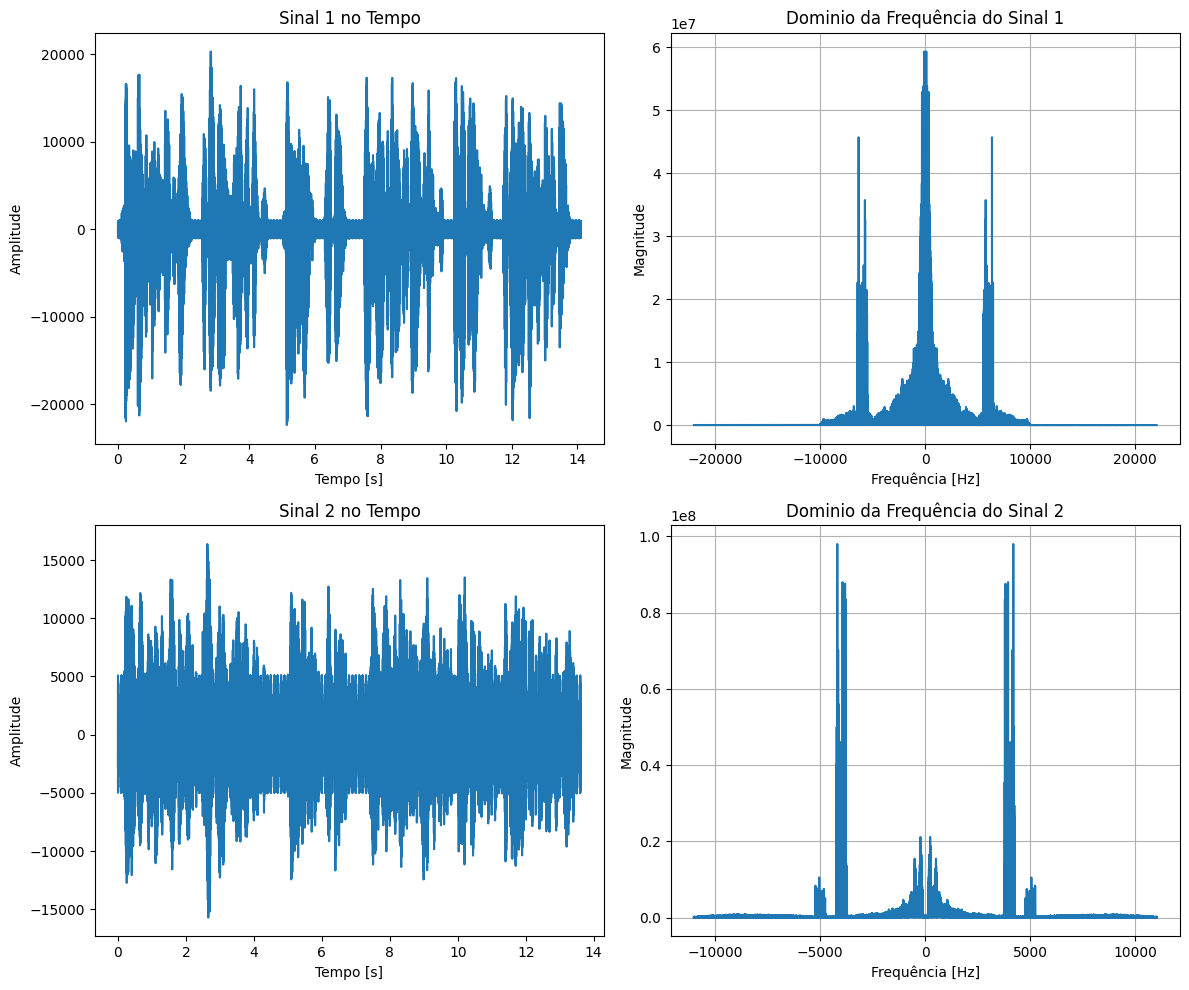

In [25]:
plt.figure(figsize=(12, 10))

for i in range(len(signals)):
    # Sinal no tempo
    plt.subplot(len(signals), 2, 2*i + 1)
    plt.plot(ts[i], signals[i])
    plt.title(f'Sinal {i+1} no Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    
    #frequência
    plt.subplot(len(signals), 2, 2*i + 2)
    plt.plot(fs[i], np.abs(ffts[i]))
    plt.title(f'Dominio da Frequência do Sinal {i+1}')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()

plt.tight_layout()
plt.show()

#### Plot dos espectros


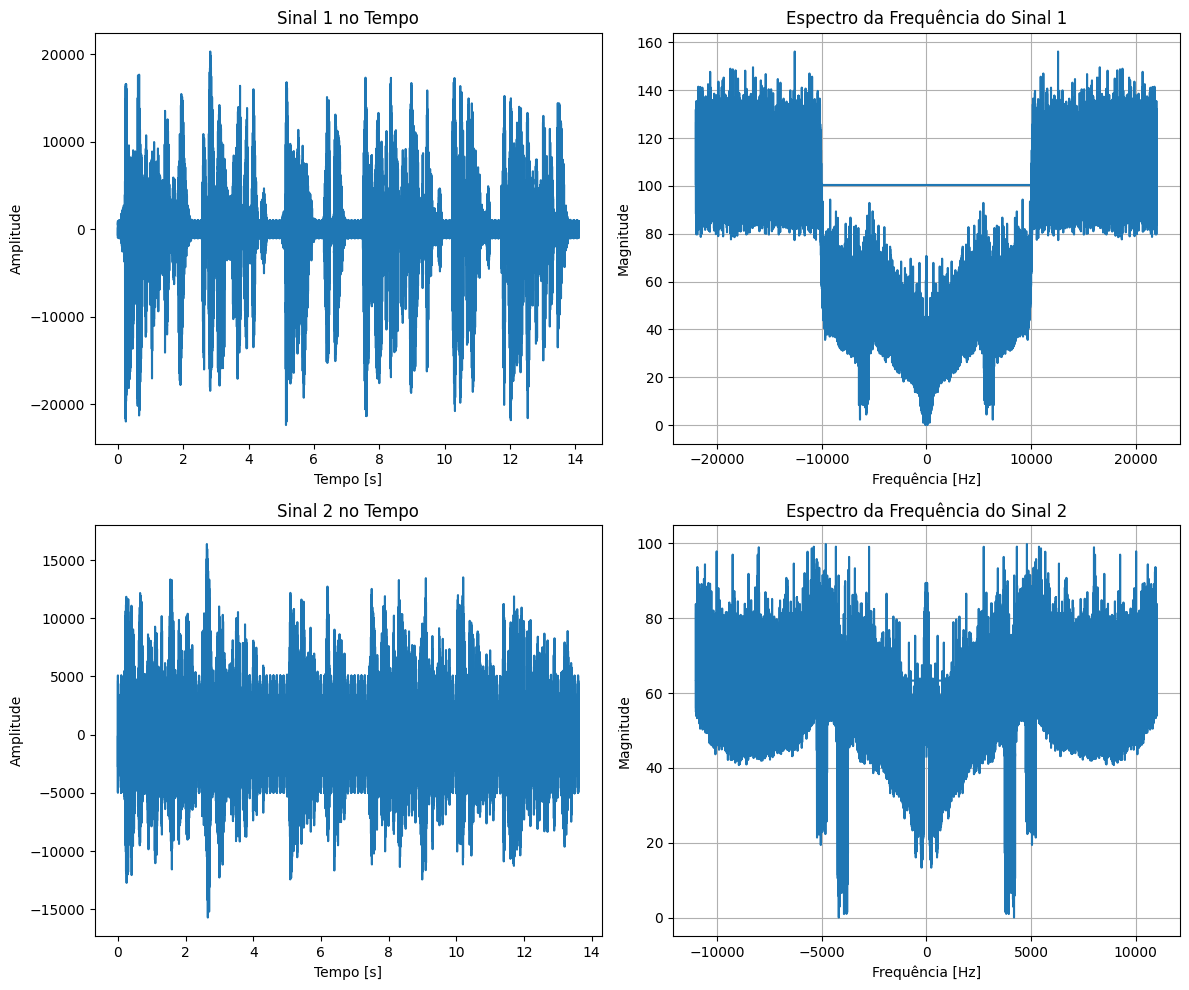

In [26]:
plt.figure(figsize=(12, 10))

for i in range(len(signals)):
    # Sinal no tempo
    plt.subplot(len(signals), 2, 2*i + 1)
    plt.plot(ts[i], signals[i])
    plt.title(f'Sinal {i+1} no Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    
    #frequência
    plt.subplot(len(signals), 2, 2*i + 2)
    plt.plot(fs[i], np.abs(spectrums[i]))
    plt.title(f'Espectro da Frequência do Sinal {i+1}')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()

plt.tight_layout()
plt.show()

### Avaliando o espectro do sinal:



### Implementando o filtro h[n] com $\omega_c$ e $L$